In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from collections import defaultdict
import csv
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
#from sklearn.cross_validation import KFold
from sklearn.svm import SVC

In [2]:
data_path = os.path.join(os.getcwd(), 'data', 'attributes_report.csv')
data = pd.read_csv(data_path, delimiter = ',')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 3 columns):
company                        950 non-null int64
company_type                   950 non-null object
subscribed_after_free_trial    950 non-null bool
dtypes: bool(1), int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
data.head(10)

,company,company_type,subscribed_after_free_trial
0,346782,uk_limited_company,False
1,346783,uk_limited_company,False
2,346784,uk_limited_company,True
3,346785,uk_limited_company,False
4,346786,uk_limited_company,False
5,346787,uk_limited_company,False
6,346788,uk_limited_company,False
7,346789,uk_limited_company,False
8,346790,uk_limited_company,False
9,346791,uk_limited_company,False


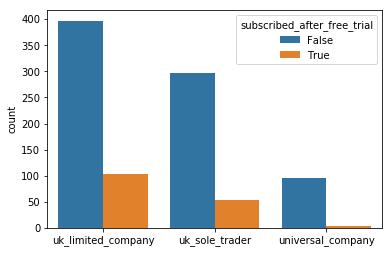

In [5]:
ax = sns.countplot(x='company_type', hue='subscribed_after_free_trial', data=data)
plt.xlabel('')
plt.show()

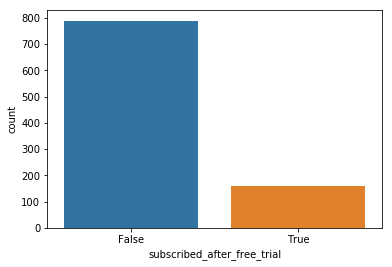

In [6]:
ax = sns.countplot(x='subscribed_after_free_trial', data=data)
plt.show()

In [7]:
path = os.path.join(os.getcwd(), 'data', 'engagement_report.log')
log = open(path,'r')

In [8]:
line = log.readline()
log_data = defaultdict(list)
while line :
    #print line    
    company = line.split(' ')[1]
    log_time = int(line.split(' ')[4])
    day = line.split(' ')[-1]
    #print "{},{},{}".format(company, log_time, day)
   
    #log_data[company] = [log_time]
    log_data[company].append(log_time)    
    
    line = log.readline()
log.close()
log_data = dict(log_data)
log_sum = {}
for company in log_data:
    log_sum[company] = sum(log_data[company])

In [9]:
path = os.path.join(os.getcwd(), 'data', 'result.csv')
with open(data_path,'r') as csvinput, open(path, 'w') as csvoutput:
    writer = csv.writer(csvoutput, lineterminator='\n')
    reader = csv.reader(csvinput)

    all = []
    row = next(reader)
    row.append('day0')
    row.append('day1')
    row.append('day2')
    row.append('day3')
    row.append('day4')
    row.append('day5')
    row.append('day6')
    row.append('total_time_used')
    all.append(row)

    for row in reader:
        row.append(log_data[row[0]][0])        
        row.append(log_data[row[0]][1])
        row.append(log_data[row[0]][2])
        row.append(log_data[row[0]][3])
        row.append(log_data[row[0]][4])
        row.append(log_data[row[0]][5])
        row.append(log_data[row[0]][6])
        row.append(log_sum[row[0]])
        all.append(row)

    writer.writerows(all)

In [10]:
data_path_result = os.path.join(os.getcwd(), 'data', 'result.csv')
data_result = pd.read_csv(data_path_result, delimiter = ',')

In [11]:
data_result.head(10)
data = data_result

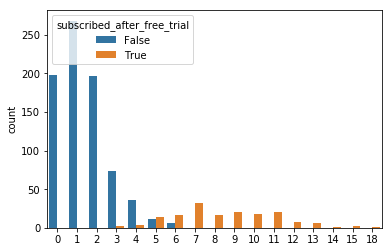

In [12]:
ax = sns.countplot(x='total_time_used', hue='subscribed_after_free_trial', data=data_result)
plt.xlabel('')
plt.show()

In [13]:
le = LabelEncoder().fit(data['company_type'])
data['company_type'] = le.transform(data['company_type'])

In [14]:
data.head(6)

,company,company_type,subscribed_after_free_trial,day0,day1,day2,day3,day4,day5,day6,total_time_used
0,346782,0,False,1,0,1,0,1,0,0,3
1,346783,0,False,0,0,0,0,0,0,0,0
2,346784,0,True,1,0,0,1,4,1,0,7
3,346785,0,False,0,0,0,0,0,0,0,0
4,346786,0,False,0,0,0,0,0,0,0,0
5,346787,0,False,0,0,0,0,1,0,0,1


In [15]:
X = data.drop('subscribed_after_free_trial', axis=1)
y = data['subscribed_after_free_trial']
clf = GaussianNB()
clf.fit(X, y)
ca = clf.score(X,y)
print('Classification accuracy: {}'.format(ca))

Classification accuracy: 0.952631578947


In [16]:

lr = LogisticRegression(solver='lbfgs')
lr.fit(X, y)
ca = lr.score(X, y)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
#ca = lr.score(X_val, y_val)
#print('Classification accuracy of the LogisticRegression classifier on validation set: {:.5f}'.format(ca))

Classification accuracy of the LogisticRegression classifier on training set: 0.83053


In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.split(X)
y_pred = cross_val_predict(lr, X, y, cv=kf)
ca = lr.score(X, y_pred)
print('Classification accuracy: {:.5f}'.format(ca))

Classification accuracy: 0.97368


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
clf = GaussianNB()
clf.fit(X_train, y_train)
ca_tr = clf.score(X_train,y_train)
ca = clf.score(X_test,y_test)
print('Classification accuracy on train data: {:.5f}'.format(ca_tr))
print('Classification accuracy on test data: {:.5f}'.format(ca))

Classification accuracy on train data: 0.95395
Classification accuracy on test data: 0.95789
